## Importing libraries

In [74]:
#matplotlib for visualization
import matplotlib.pyplot as plt

#pandas for data analysis and manipulation
import pandas as pd

#seaborn for heat map plotting, visualization
import seaborn as sns

## Dataset loading

In [86]:
# Load the dataset
data = pd.read_csv("WHO-COVID-19-global-data.csv")
data.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


## Pre-processing

In [87]:
# Change date format to months and years only
data['Date_reported'] = pd.to_datetime(data['Date_reported']).dt.strftime('%m/%y')

# Make a new dataframe that has only the necessary columns and group them
grouped = data.groupby(data['Country'])[['New_cases']].sum()
grouped

,New_cases
Country,
Afghanistan,208771
Albania,333300
Algeria,271395
American Samoa,8320
Andorra,47860
...,...
Wallis and Futuna,3427
Yemen,11945
Zambia,340944


In [88]:
# Reset the index of the grouped DataFrame and add a new column named 'Country' that contains the original index values.
grouped = grouped.reset_index()
grouped['Country'] = grouped.index

# You'll need to add the 'Country' column back to the DataFrame.
grouped['Country'] = data['Country'].unique()
grouped


,Country,New_cases
0,Afghanistan,208771
1,Albania,333300
2,Algeria,271395
3,American Samoa,8320
4,Andorra,47860
...,...,...
232,Viet Nam,3427
233,Wallis and Futuna,11945
234,Yemen,340944
235,Zambia,263083


In [89]:
# Drop any unnecessary columns, if any
#columns_to_drop = ['level_0', 'index']
#grouped = grouped.drop(columns_to_drop, axis=1)
grouped


,Country,New_cases
0,Afghanistan,208771
1,Albania,333300
2,Algeria,271395
3,American Samoa,8320
4,Andorra,47860
...,...,...
232,Viet Nam,3427
233,Wallis and Futuna,11945
234,Yemen,340944
235,Zambia,263083


## Line graph

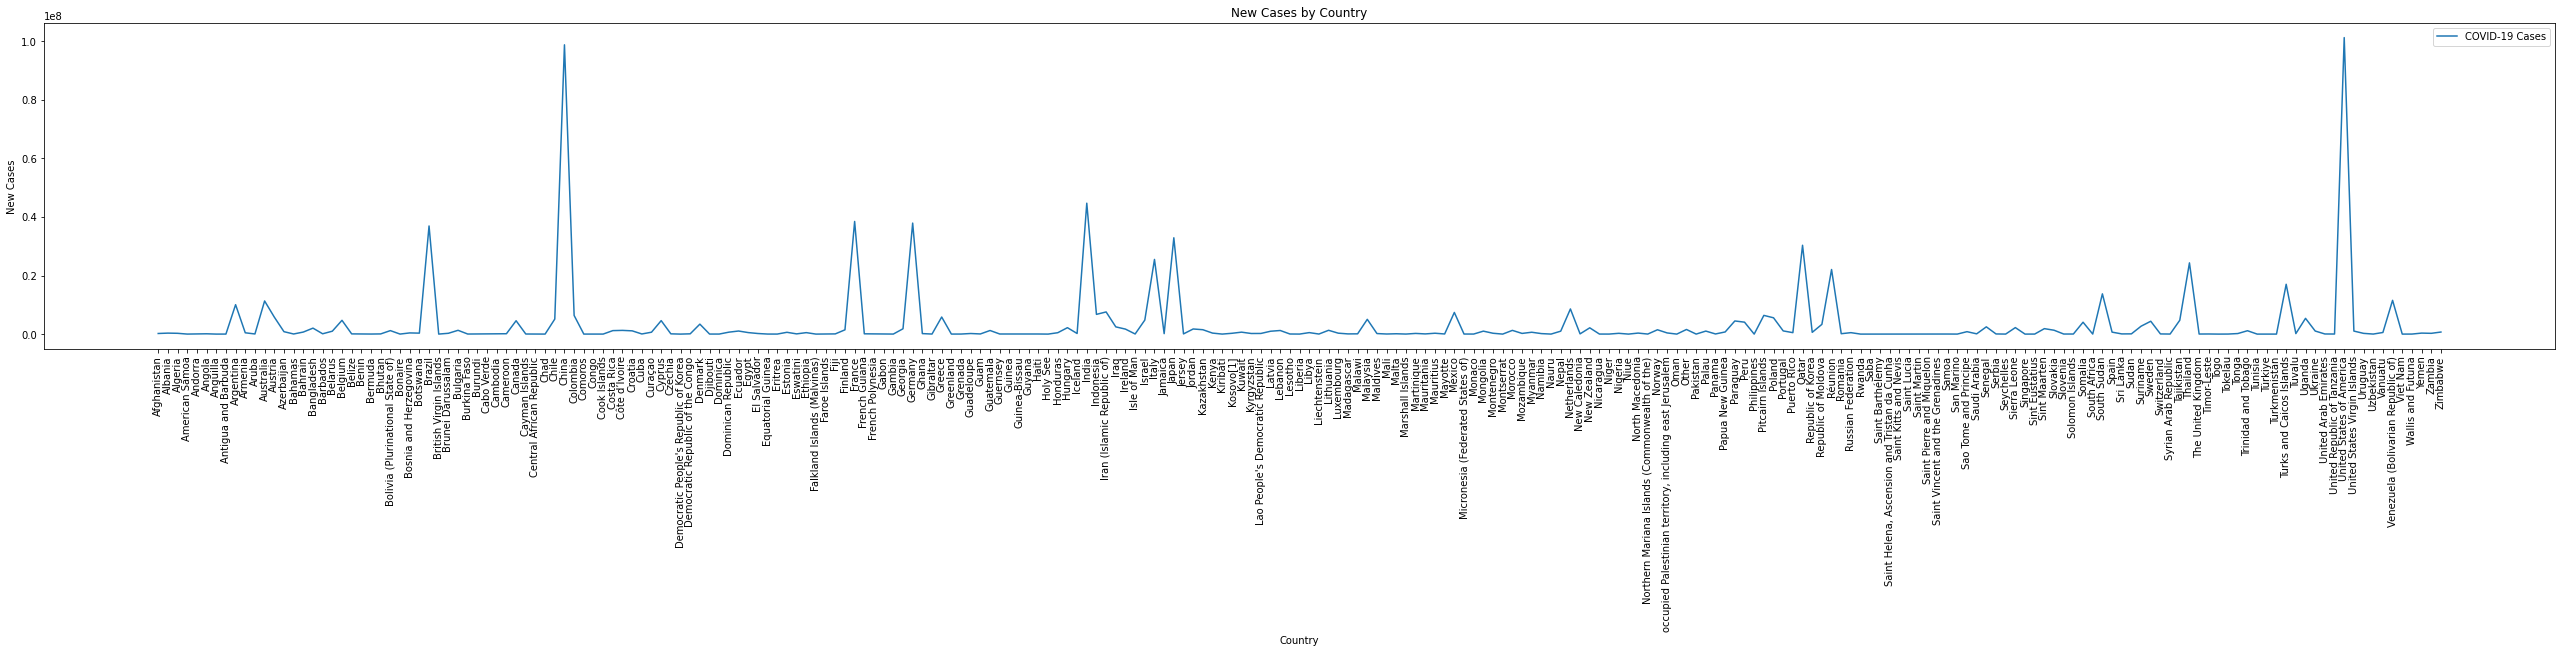

In [90]:
# Plot the line graph
plt.figure(figsize=(45, 6))
plt.plot(grouped["Country"], grouped["New_cases"], label="COVID-19 Cases")

# Add labels and title to the graph
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.title('New Cases by Country')
plt.xticks(rotation=90)
plt.legend()

# Show the graph
plt.show()


## Bar chart

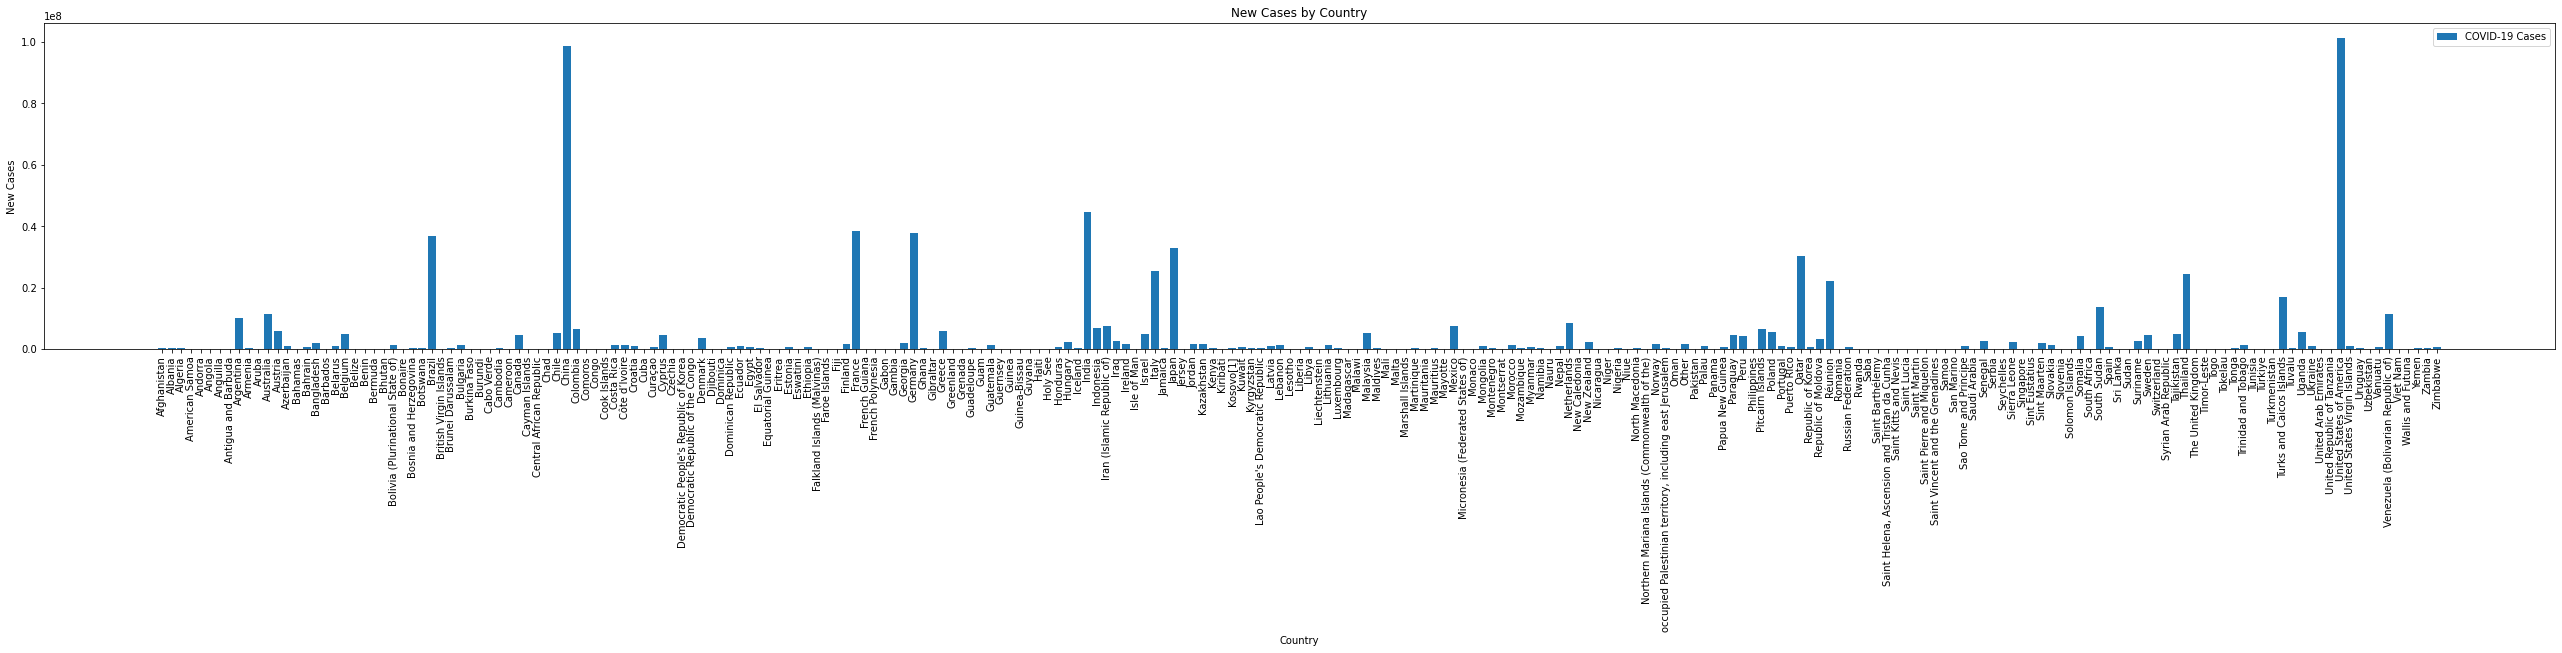

In [91]:
# Plot the bar chart
plt.figure(figsize=(45, 6))
plt.bar(grouped["Country"], grouped["New_cases"], label="COVID-19 Cases")

# Add labels and title to the graph
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.title('New Cases by Country')
plt.xticks(rotation=90)
plt.legend()

# Show the graph
plt.show()


## Histogram

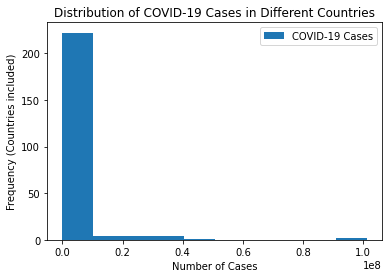

In [92]:
# Plot the histogram
plt.hist(grouped["New_cases"], bins=10, label="COVID-19 Cases")

# Add labels and title to the graph
plt.xlabel("Number of Cases")
plt.ylabel("Frequency (Countries included)")
plt.title("Distribution of COVID-19 Cases in Different Countries")
plt.legend()

# Show the graph
plt.show()



## Heatmap

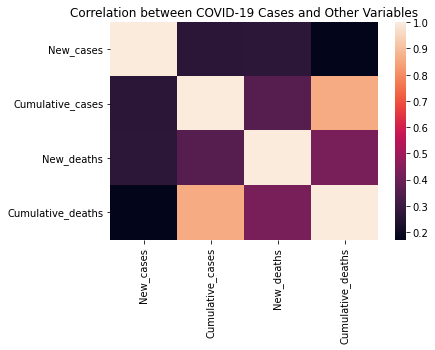

In [93]:
# Plot the heatmap
sns.heatmap(data.corr(), annot=False)

# Add title to the graph
plt.title("Correlation between COVID-19 Cases and Other Variables")

# Show the graph
plt.show()


*Thank you!*